In [1]:
push!(LOAD_PATH,"julia/src/Simulation")
import Simulation

┌ Info: Precompiling Simulation [top-level]
└ @ Base loading.jl:1260


In [12]:
using Random
using Distributions
using DataStructures
using JLD2
using FileIO
using Interpolations
using Polynomials

In [3]:
@load "tracking_heatmap_wrocław.jld2" 
varinfo()

| name       |      size | summary              |
|:---------- | ---------:|:-------------------- |
| Base       |           | Module               |
| Core       |           | Module               |
| Main       |           | Module               |
| results_05 | 3.484 KiB | 21×21 Array{Int64,2} |
| results_1  | 3.484 KiB | 21×21 Array{Int64,2} |
| results_2  | 3.484 KiB | 21×21 Array{Int64,2} |
| results_3  | 3.484 KiB | 21×21 Array{Int64,2} |
| results_7  | 3.484 KiB | 21×21 Array{Int64,2} |


In [6]:
println(results_2)

[293 293 293 293 293 293 293 293 293 293 293 293 293 293 293 293 293 293 293 293 293; 432 431 462 409 407 406 398 404 400 400 406 385 388 400 390 423 412 408 391 389 409; 700 647 609 657 651 600 550 597 553 666 557 596 525 599 514 631 548 550 601 551 562; 1523 1560 1845 1506 1569 1347 1096 954 1036 900 959 934 1107 948 811 756 774 809 736 796 828; 125653 104043 79883 53954 36725 6543 4264 1953 2481 1688 2154 1752 1701 1847 1259 1042 1144 1252 932 1155 957; 290718 272373 258038 242585 217732 180207 145396 91518 60124 22780 6868 3708 4612 2122 2867 2305 1842 1771 1522 1566 1218; 384417 376475 362487 348425 323820 304951 282498 248139 217804 176867 133186 87111 52615 9317 6256 3702 3614 2774 2096 1768 1538; 446926 440918 428344 414712 399285 383257 362672 341261 312886 279463 249123 205982 155176 121347 56722 6524 2825 5463 3383 2924 2404; 488885 482362 473335 463670 451357 437379 416864 399283 377441 351068 325371 293290 248543 219289 147505 93829 37570 10603 4323 3944 3546; 520209 51399

In [100]:
include("julia/src/plot_utils.jl")


plot_heatmap (generic function with 4 methods)

In [ ]:
individual

In [ ]:
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_05), 
    "_Wrocław_05day_smooth",
    0:0.005:1,
    0:0.005:1);

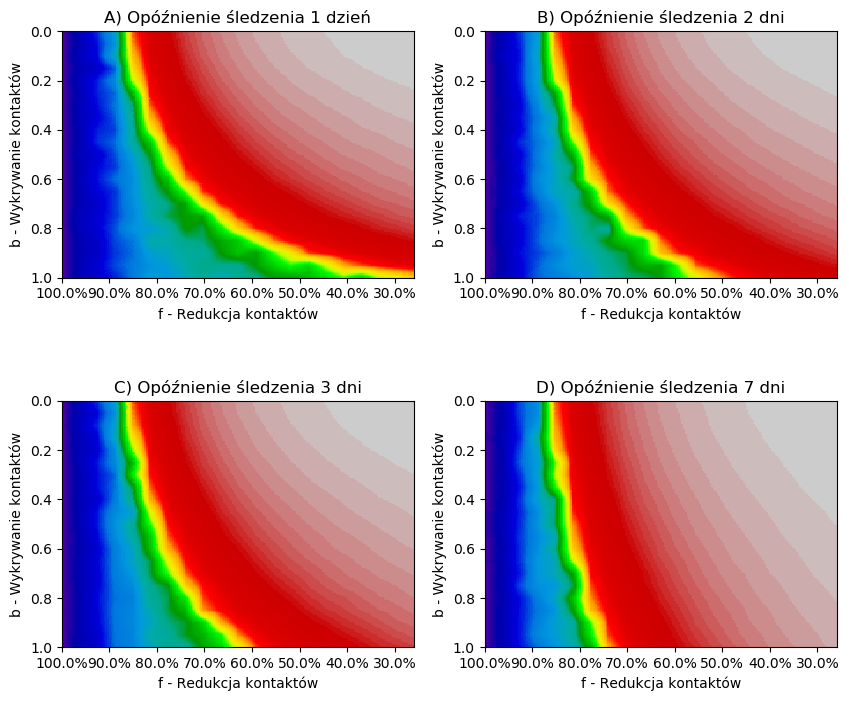

In [157]:
figure(figsize=(10,8))

subplot(221)
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_1), 
    "A) Opóźnienie śledzenia 1 dzień",
    0:0.005:1,
    0:0.005:1);

subplot(222)
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_2), 
    "B) Opóźnienie śledzenia 2 dni",
    0:0.005:1,
    0:0.005:1);

subplot(223)
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_3), 
    "C) Opóźnienie śledzenia 3 dni",
    0:0.005:1,
    0:0.005:1);

subplot(224)
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_7), 
    "D) Opóźnienie śledzenia 7 dni",
    0:0.005:1,
    0:0.005:1);

subplots_adjust(hspace=0.5)

savefig("tracking4_Wrocław.png")

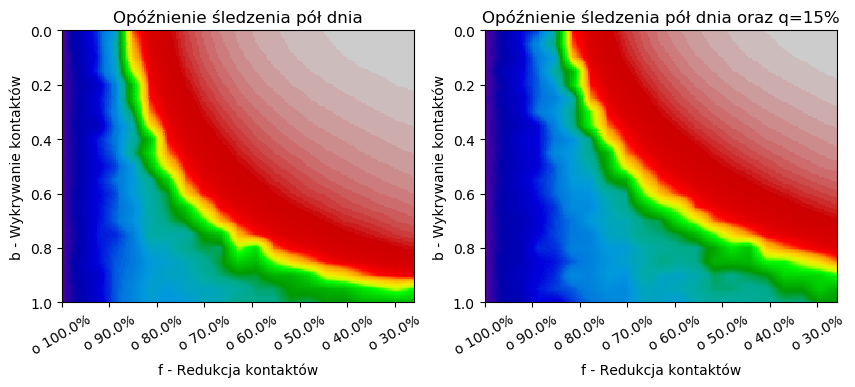

In [172]:
figure(figsize=(10,4))

subplot(121)
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_05), 
    "Opóźnienie śledzenia pół dnia",
    0:0.005:1,
    0:0.005:1);

subplot(122)
subplot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_h), 
    "Opóźnienie śledzenia pół dnia oraz q'=15%",
    0:0.005:1,
    0:0.005:1);
subplots_adjust(bottom=0.2)

savefig("tracking2_Wrocław.png")

In [169]:
function subplot_heatmap(results, title_txt, tracking_probs = 0:0.05:1, Cs=0:0.05:1, logplot::Bool=true)
  reduction = 1 .- Cs / 1.35  |> collect
  if logplot
    pcolor(reduction, tracking_probs, results', 
     norm=matplotlib.colors.LogNorm(vmin=minimum(results), vmax=maximum(results)),
     cmap="nipy_spectral")
     clim(vmin=10^2)
  end     
  #cbar = colorbar()
  #cbar.set_label("Całkowita liczba zarażonych")

  xlabel("f - Redukcja kontaktów")
  
  xticks(
    0.3:0.1:1,
    ["o $(100*f)%" for f in 0.3:0.1:1])
  xticks(rotation=30)
    
  ylabel("b - Wykrywanie kontaktów")
  title("$title_txt")
  gca().invert_yaxis()
  gca().invert_xaxis()

end

subplot_heatmap (generic function with 4 methods)

In [112]:
function plot_heatmap(results, title, tracking_probs = 0:0.05:1, Cs=0:0.05:1, logplot::Bool=true)
  figure(figsize=(10,5))
  reduction = 1 .- Cs / 1.35  |> collect
  if logplot
    pcolor(reduction, tracking_probs, results', 
     norm=matplotlib.colors.LogNorm(vmin=minimum(results), vmax=maximum(results)),
     cmap="nipy_spectral")
     clim(vmin=10^2)
  end     
  cbar = colorbar()
  cbar.set_label("Całkowita liczba zarażonych")

  xlabel("f - Stopień redukcji kontaktów")
  
  xticks(
    0.3:0.1:1,
    ["o $(100*f)%" for f in 0.3:0.1:1])
  
  ylabel("b - Skuteczność wykrywania kontaktów")

  gca().invert_yaxis()
  gca().invert_xaxis()
  savefig("tracking_heatmap_$title.png")
end

plot_heatmap (generic function with 4 methods)

In [101]:
function smooth_heatmap(x,y,Z)
    itp = interpolate(Z' .|> log, BSpline(Linear()))
    itp.(vec(x)', vec(y)) .|> exp
end

smooth_heatmap (generic function with 1 method)

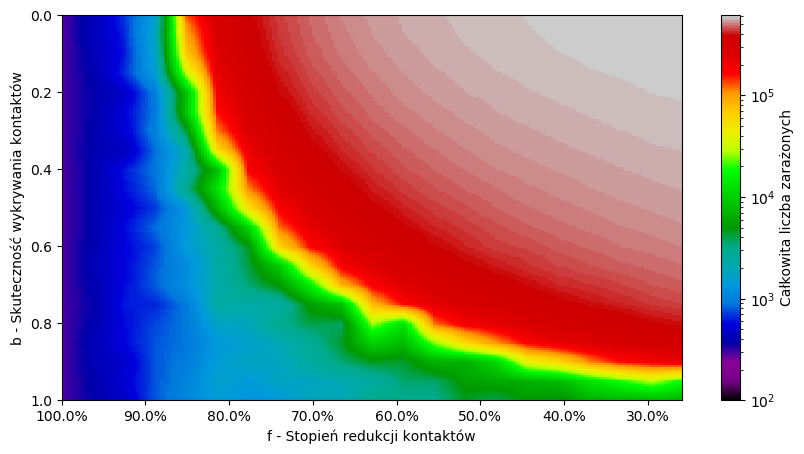

In [118]:
plot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_05), 
    "_Wrocław_05day_smooth",
    0:0.005:1,
    0:0.005:1);

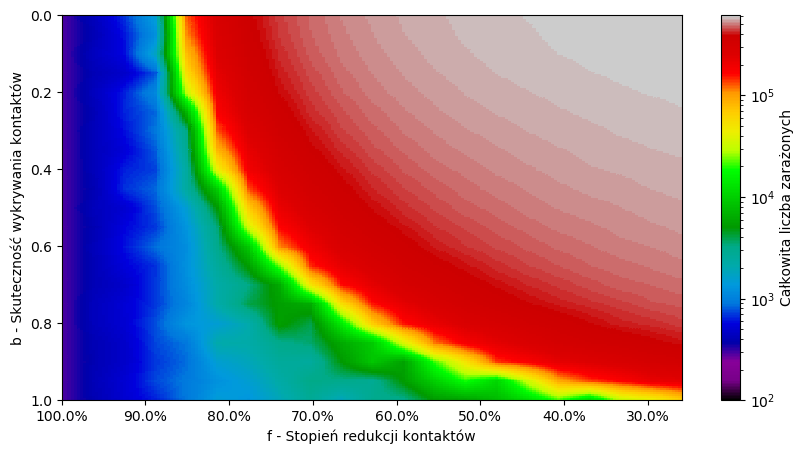

In [117]:
plot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_1), 
    "_Wrocław_1day_smooth",
    0:0.005:1,
    0:0.005:1);

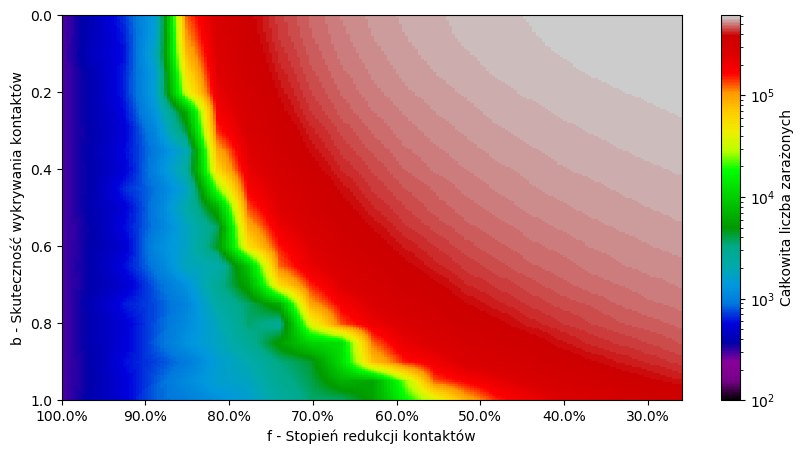

In [113]:
plot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_2), 
    "_Wrocław_2day_smooth",
    0:0.005:1,
    0:0.005:1);

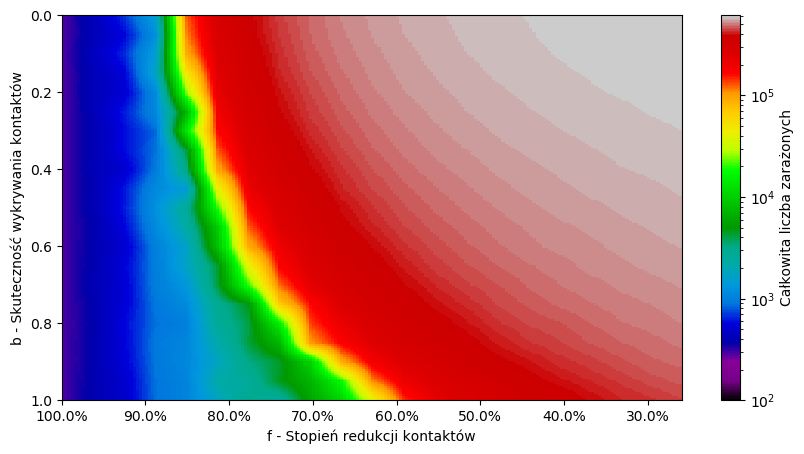

In [114]:
plot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_3), 
    "_Wrocław_3day_smooth",
    0:0.005:1,
    0:0.005:1);

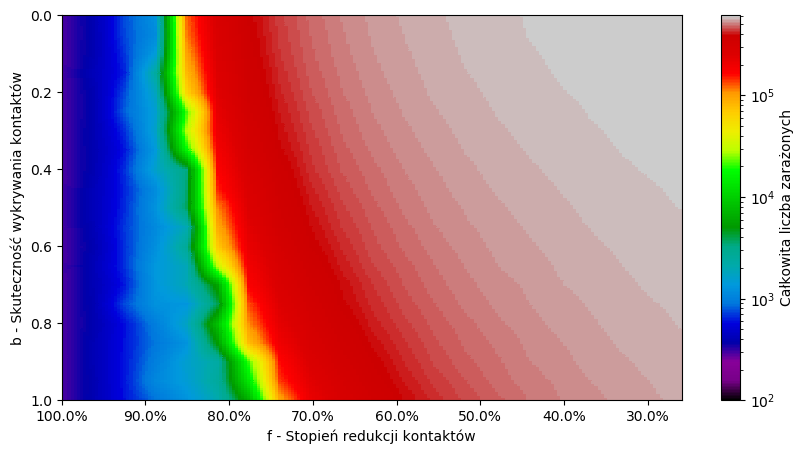

In [115]:
plot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, results_7), 
    "_Wrocław_7day_smooth",
    0:0.005:1,
    0:0.005:1);

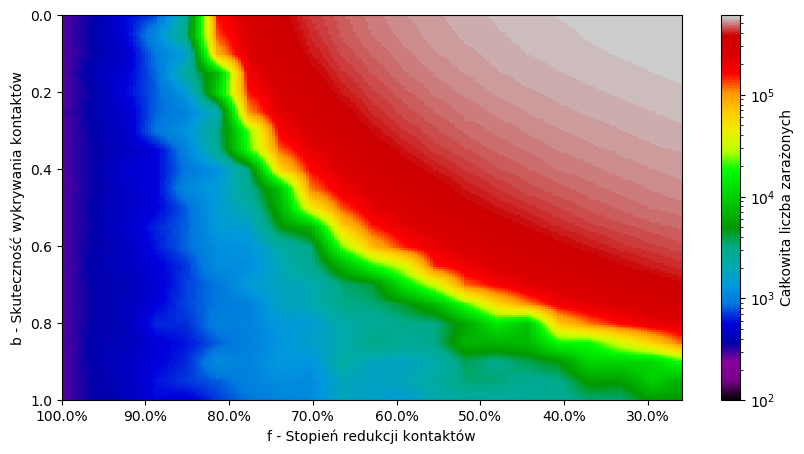

In [116]:
plot_heatmap(
    smooth_heatmap(1:0.1:21, 1:0.1:21, load("tracking_heatmap_wrocław_hacked.jld2")["results_05"]), 
    "_Wrocław_05day_hacked_smooth",
    0:0.005:1,
    0:0.005:1);

In [9]:
function smooth_critical_line(
        results::AbstractArray{T} where T <: Real,
        tracking_probs::AbstractRange{T} where T <: Real,
        Cs::AbstractRange{T} where T <: Real;
        threshold::Real = 10^4,
        polydeg=4
    )
    linepoints = map( ((i,s),)->(findlast(s.<threshold),i), enumerate(eachslice(results, dims=2)) )
    x = getindex.(linepoints,1)
    y = getindex.(linepoints,2)
    
    #return x,y
    polynomial_y = polyfit(Cs[y], tracking_probs[x], polydeg)
    polynomial_x = polyfit(tracking_probs[x], Cs[y], polydeg)
    return polynomial_y, polynomial_x, tracking_probs[x], tracking_probs[y]
end

smooth_critical_line (generic function with 1 method)

In [13]:
using PyPlot
x,y = smooth_critical_line(smooth_heatmap, tracking_probs, Cs, threshold=50000)
plot(x,y)

UndefVarError: UndefVarError: smooth_heatmap not defined

In [16]:
x_2 |> display
y_2 |> display

21-element Array{Float64,1}:
 0.15
 0.15
 0.15
 0.15
 0.2
 0.2
 0.2
 0.2
 0.2
 0.25
 0.25
 0.25
 0.25
 0.3
 0.3
 0.35
 0.4
 0.45
 0.45
 0.55
 0.6

21-element Array{Float64,1}:
 0.0
 0.05
 0.1
 0.15
 0.2
 0.25
 0.3
 0.35
 0.4
 0.45
 0.5
 0.55
 0.6
 0.65
 0.7
 0.75
 0.8
 0.85
 0.9
 0.95
 1.0

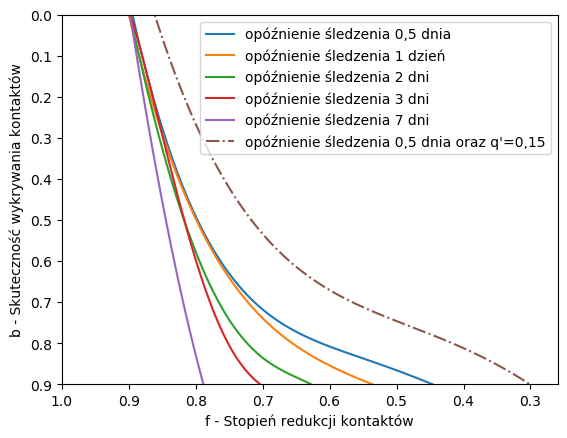

In [14]:
tracking_probs = 0:0.05:1
Cs = 0:0.05:1
reduction = 1 .- Cs / 1.35
results_h = load("tracking_heatmap_wrocław_hacked.jld2")["results_05"]

poly_y_05, poly_x_05, x_05, y_05 = smooth_critical_line(results_05, tracking_probs, Cs, threshold=50000)
poly_y_1, poly_x_1, x_1, y_1 = smooth_critical_line(results_1, tracking_probs, Cs, threshold=50000, polydeg=4)
poly_y_2, poly_x_2, x_2, y_2 = smooth_critical_line(results_2, tracking_probs, Cs, threshold=50000, polydeg=4)
poly_y_3, poly_x_3, x_3, y_3 = smooth_critical_line(results_3, tracking_probs, Cs, threshold=50000, polydeg=4)
poly_y_7, poly_x_7, x_7, y_7 = smooth_critical_line(results_7, tracking_probs, Cs, threshold=50000, polydeg=2)
poly_y_h, poly_x_h, x_h, y_h = smooth_critical_line(results_h, tracking_probs, Cs, threshold=50000, polydeg=4)

Cs_mini = 0.1:0.005:1
reduction_mini = 1 .- Cs_mini / 1.35

Cs_mini2 = 0.1:0.005:0.5
reduction_mini2 = 1 .- Cs_mini2 /1.35
plot(reduction_mini, polyval.(poly_x_05, Cs_mini), label="opóźnienie śledzenia 0,5 dnia")
plot(reduction_mini, polyval.(poly_x_1, Cs_mini), label="opóźnienie śledzenia 1 dzień")
plot(reduction_mini, polyval.(poly_x_2, Cs_mini), label="opóźnienie śledzenia 2 dni")
plot(reduction_mini, polyval.(poly_x_3, Cs_mini), label="opóźnienie śledzenia 3 dni")
plot(reduction_mini2, polyval.(poly_x_7, Cs_mini2), label="opóźnienie śledzenia 7 dni")
plot(reduction_mini, polyval.(poly_x_h, Cs_mini), "-.", label="opóźnienie śledzenia 0,5 dnia oraz q'=0,15")

xlim(minimum(reduction),maximum(reduction))
ylim(0,0.9)
  gca().invert_yaxis()
  gca().invert_xaxis()

legend()
xlabel("f - Stopień redukcji kontaktów")
ylabel("b - Skuteczność wykrywania kontaktów")
savefig("wrocław_tracking_critical_lines.png")

In [17]:
poly_y_2

Poly(0.1411594202898547 + 0.22114034343136235*x - 0.1591905051320719*x^2 + 0.03988373890107866*x^3 + 0.3622168651109412*x^4)

In [254]:
Cs[x.|>Int]

21-element Array{Float64,1}:
 0.15
 0.15
 0.15
 0.15
 0.2
 0.2
 0.2
 0.2
 0.25
 0.2
 0.25
 0.25
 0.3
 0.35
 0.35
 0.45
 0.45
 0.55
 0.65
 0.8
 1.0

In [219]:
linepoints = map( ((i,s),)->(findlast(s.<10^4),i), enumerate(eachslice(results_05, dims=2)) )
x = getindex.(linepoints,1) .|> Float64
y = getindex.(linepoints,2) .|> Float64
#linepoints |> display
arr = zeros(Int,21,21)
for (x,y) in linepoints
    arr[x,y] = 1
end
arr


21×21 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0 

In [231]:
using Polynomials
#y |> display
#x |> display
polynomial = polyfit(y.|> Float64, x.|>Float64,4)
polynomial = polyfit((y.-1)./20, (x.-1)./20 .|>Float64, 4)
polynomial2 = polyfit((x.-1)./20, Cs, 4)

Poly(-1.1133815734479575 + 11.1267476148287*x - 24.76119070519719*x^2 + 25.12608483968095*x^3 - 9.380503339860185*x^4)

In [234]:
x


21-element Array{Float64,1}:
  4.0
  4.0
  4.0
  4.0
  5.0
  5.0
  5.0
  5.0
  6.0
  5.0
  6.0
  6.0
  7.0
  8.0
  8.0
 10.0
 10.0
 12.0
 14.0
 17.0
 21.0

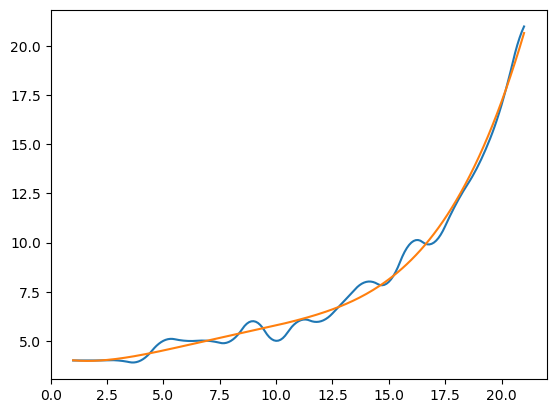

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16c9a2fd0>

In [173]:
itp = interpolate(x.|> Float64, BSpline(Quadratic(Reflect(OnCell()))));
X = 1:0.1:21
plot(X, itp.(X))
plot(X, polyval.(polynomial, X))

In [235]:
xres = polyval.(polynomial, tracking_probs)
yres = polyval.(polynomial3, Cs)

21-element Array{Float64,1}:
 -1.1133815734479573
 -0.6158650370104297
 -0.22413068451136497
  0.07855543442752877
  0.30752019468356506
  0.47668339563307716
  0.598557761151421
  0.6842489396129727
  0.7434555038911286
  0.7844689513583067
  0.8141737038859469
  0.8380471078445084
  0.8601594341034717
  0.8831738780313396
  0.9083465594956344
  0.9355265228629006
  0.9631557369987032
  0.988269095267625
  1.0064944155332756
  1.012052440158283
  0.9977568360042948

In [241]:
results = results_05
figure(figsize=(10,5))
  reduction = (1 .- Cs) / 1.35 
  reduction |> println
  #pcolor(reduction, tracking_probs, results', 
  # norm=matplotlib.colors.LogNorm(vmin=minimum(results), vmax=maximum(results)),
  # cmap="nipy_spectral")
  #pcolor(reduction, tracking_probs, arr')
  pcolor(reduction, tracking_probs, results', cmap="chocolate")
  colorbar()

  xlabel("contact reduction")
  ylabel("tracking probability")
  plot((1 .- xres) / 1.35, tracking_probs)
  plot(reduction, yres)
  clim(vmin=10^2)
  gca().invert_yaxis()
  gca().invert_xaxis()

  ylim(1,0)
 


0.7407407407407407:-0.037037037037037035:-7.888609052210118e-31


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/tomek/.julia/packages/PyCall/zqDXB/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Colormap chocolate is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r')
  File "/Users/tomek/.julia/conda/3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 2744, in pcolor
    **kwargs)
  File "/Users/tomek/.julia/conda/3/lib/python3.7/site-packages/matplotlib/__init__.py", line 1599, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/tomek/.julia/conda/3/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 5965, in pcolor
    collection.set_cmap(cmap)
  File "/Users/tomek/.julia/conda/3/lib/python3.7/site-packages/matplotlib/cm.py", line 353, in set_cmap
    cmap = get_cmap(cmap)
  File "/Users/tomek/.julia/conda/3/lib/python3.7/site-packages/matplotlib/cm.py", line 183, in get_cmap
    % (name, ', '.join(sorted(cmap_d))))


In [11]:
Cs = 0:0.05:1
tracking_probs = 0:0.05:1
param_grid = Iterators.product(Cs, tracking_probs) |> collect
results_1 = map(param_grid) do (c,p)
    println("c=$c p=$p")
    state = simple_run(tracking_prob=p, constant_kernel_param=c, tracking_delay=1.0)
    affected = getproperty.(state.individuals, :health) .!= Simulation.Healthy
    count(affected)
end

c=0.0 p=0.0
Empty queue after 2925 events 
  0.016027 seconds (14.12 k allocations: 781.420 KiB)
c=0.05 p=0.0
Empty queue after 4199 events 
  0.023846 seconds (7.42 k allocations: 467.851 KiB)
c=0.1 p=0.0
Empty queue after 6474 events 
  0.003438 seconds (3.86 k allocations: 281.641 KiB)
c=0.15 p=0.0
Empty queue after 13673 events 
  0.007727 seconds (9.23 k allocations: 587.281 KiB)
c=0.2 p=0.0
Empty queue after 1113819 events 
  0.980348 seconds (806.58 k allocations: 46.233 MiB)
c=0.25 p=0.0
Empty queue after 2530810 events 
  2.100000 seconds (1.88 M allocations: 106.783 MiB)
c=0.3 p=0.0
Empty queue after 3315390 events 
  4.265052 seconds (2.52 M allocations: 140.577 MiB, 5.48% gc time)
c=0.35 p=0.0
Empty queue after 3823882 events 
  3.794398 seconds (2.97 M allocations: 161.023 MiB, 6.34% gc time)
c=0.4 p=0.0
Empty queue after 4162143 events 
  5.862489 seconds (3.31 M allocations: 178.906 MiB, 1.94% gc time)
c=0.45 p=0.0
Empty queue after 4412354 events 
  8.057052 seconds (3.

Empty queue after 6093 events 
  0.002630 seconds (2.66 k allocations: 260.359 KiB)
c=0.1 p=0.35
Empty queue after 8810 events 
  0.003521 seconds (4.06 k allocations: 353.203 KiB)
c=0.15 p=0.35
Empty queue after 13255 events 
  0.005336 seconds (6.16 k allocations: 476.797 KiB)
c=0.2 p=0.35
Empty queue after 44578 events 
  0.022234 seconds (23.15 k allocations: 1.529 MiB)
c=0.25 p=0.35
Empty queue after 1378096 events 
  0.763350 seconds (717.28 k allocations: 42.398 MiB, 3.17% gc time)
c=0.3 p=0.35
Empty queue after 3546780 events 
  2.340807 seconds (1.88 M allocations: 110.469 MiB)
c=0.35 p=0.35
Empty queue after 5052821 events 
  3.915212 seconds (2.73 M allocations: 157.221 MiB, 10.86% gc time)
c=0.4 p=0.35
Empty queue after 5990200 events 
  6.037383 seconds (3.29 M allocations: 188.165 MiB, 1.27% gc time)
c=0.45 p=0.35
Empty queue after 6664417 events 
  5.685727 seconds (3.71 M allocations: 206.353 MiB, 0.87% gc time)
c=0.5 p=0.35
Empty queue after 7219231 events 
  8.616230 

Empty queue after 8637275 events 
  6.457581 seconds (4.89 M allocations: 247.610 MiB, 6.91% gc time)
c=0.7 p=0.5
Empty queue after 8925918 events 
  6.770584 seconds (5.14 M allocations: 266.917 MiB, 1.29% gc time)
c=0.75 p=0.5
Empty queue after 9204686 events 
  6.633047 seconds (5.38 M allocations: 273.649 MiB, 1.38% gc time)
c=0.8 p=0.5
Empty queue after 9398189 events 
  6.955100 seconds (5.58 M allocations: 294.270 MiB, 1.16% gc time)
c=0.85 p=0.5
Empty queue after 9594429 events 
  7.157667 seconds (5.78 M allocations: 298.807 MiB, 2.63% gc time)
c=0.9 p=0.5
Empty queue after 9720462 events 
  7.788745 seconds (5.95 M allocations: 290.097 MiB, 7.37% gc time)
c=0.95 p=0.5
Empty queue after 9879377 events 
  7.658302 seconds (6.14 M allocations: 306.230 MiB, 1.18% gc time)
c=1.0 p=0.5
Empty queue after 10016073 events 
  8.140502 seconds (6.31 M allocations: 309.930 MiB, 1.19% gc time)
c=0.0 p=0.55
Empty queue after 4542 events 
  0.001911 seconds (1.84 k allocations: 216.500 KiB)

c=0.25 p=0.7
Empty queue after 48216 events 
  0.079461 seconds (23.01 k allocations: 1.666 MiB)
c=0.3 p=0.7
Empty queue after 73075 events 
  0.080566 seconds (35.40 k allocations: 2.339 MiB)
c=0.35 p=0.7
Empty queue after 140297 events 
  0.488408 seconds (70.86 k allocations: 4.258 MiB)
c=0.4 p=0.7
Empty queue after 1087609 events 
  2.206212 seconds (570.39 k allocations: 31.238 MiB)
c=0.45 p=0.7
Empty queue after 3438101 events 
 10.040020 seconds (1.82 M allocations: 99.039 MiB, 3.04% gc time)
c=0.5 p=0.7
Empty queue after 4987794 events 
 14.236189 seconds (2.69 M allocations: 143.516 MiB, 6.77% gc time)
c=0.55 p=0.7
Empty queue after 6484742 events 
 19.856779 seconds (3.53 M allocations: 186.760 MiB, 4.46% gc time)
c=0.6 p=0.7
Empty queue after 7181460 events 
 21.385426 seconds (3.99 M allocations: 210.130 MiB, 1.46% gc time)
c=0.65 p=0.7
Empty queue after 7786345 events 
 23.056447 seconds (4.40 M allocations: 225.663 MiB)
c=0.7 p=0.7
Empty queue after 8315578 events 
 24.06

c=0.95 p=0.85
Empty queue after 8347244 events 
 19.343614 seconds (5.48 M allocations: 241.685 MiB, 0.91% gc time)
c=1.0 p=0.85
Empty queue after 8726430 events 
 21.704718 seconds (5.81 M allocations: 260.403 MiB, 3.64% gc time)
c=0.0 p=0.9
Empty queue after 5343 events 
  0.004581 seconds (2.29 k allocations: 257.000 KiB)
c=0.05 p=0.9
Empty queue after 8539 events 
  0.014842 seconds (3.71 k allocations: 362.422 KiB)
c=0.1 p=0.9
Empty queue after 10524 events 
  0.012763 seconds (4.88 k allocations: 494.969 KiB)
c=0.15 p=0.9
Empty queue after 16335 events 
  0.009581 seconds (7.17 k allocations: 647.578 KiB)
c=0.2 p=0.9
Empty queue after 19817 events 
  0.056552 seconds (9.14 k allocations: 754.188 KiB)
c=0.25 p=0.9
Empty queue after 38883 events 
  0.033793 seconds (18.08 k allocations: 1.410 MiB)
c=0.3 p=0.9
Empty queue after 46299 events 
  0.039660 seconds (22.10 k allocations: 1.626 MiB)
c=0.35 p=0.9
Empty queue after 62597 events 
  0.167949 seconds (31.18 k allocations: 2.030

21×21 Array{Int64,2}:
    293     291     291     291     291  …     291     291     291    291
    432     408     446     414     439        406     402     419    400
    700     615     591     488     650        489     492     526    516
   1523    1206    1709     784    1091        745     702     750    639
 125653  108275   76921   55930   30482        907     856     926    911
 290718  273091  260722  228613  198793  …    2126    1541    1247   1488
 384417  374554  359947  341145  320500       2185    1861    1532   1312
 446926  439809  426961  413755  396411       3139    2625    2235   1868
 488885  483099  474666  458812  444584       3582    2526    3279   2736
 520209  513781  506129  495073  481866       6305    5060    3142   1769
 541726  535984  529278  519574  509344  …    9596    9008    2894   3052
 558928  554643  547536  538487  528624      36577    5754    5289   3055
 571109  567575  561408  553492  543362     115931   21135   10166   5084
 581311  577819 

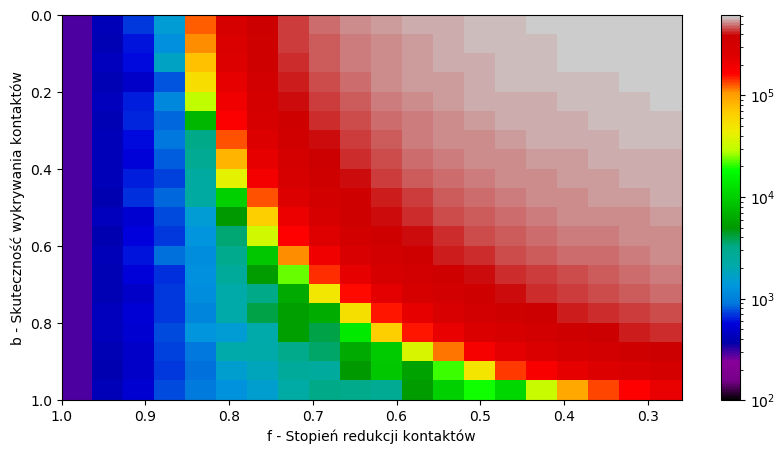

In [270]:
plot_heatmap(results_1, "_Wrocław_1day")

In [19]:
Cs = 0:0.05:1
tracking_probs = 0:0.05:1
param_grid = Iterators.product(Cs, tracking_probs) |> collect
results_2 = map(param_grid) do (c,p)
    println("c=$c p=$p")
    state = simple_run(tracking_prob=p, constant_kernel_param=c, tracking_delay=2.0)
    affected = getproperty.(state.individuals, :health) .!= Simulation.Healthy
    count(affected)
end

c=0.0 p=0.0
Empty queue after 2925 events 
  0.001393 seconds (1.21 k allocations: 123.844 KiB)
c=0.05 p=0.0
Empty queue after 4199 events 
  0.002337 seconds (2.14 k allocations: 178.312 KiB)
c=0.1 p=0.0
Empty queue after 6474 events 
  0.003228 seconds (3.86 k allocations: 281.641 KiB)
c=0.15 p=0.0
Empty queue after 13673 events 
  0.007076 seconds (9.23 k allocations: 587.281 KiB)
c=0.2 p=0.0
Empty queue after 1113819 events 
  0.685712 seconds (806.58 k allocations: 46.233 MiB)
c=0.25 p=0.0
Empty queue after 2530810 events 
  1.883744 seconds (1.88 M allocations: 106.783 MiB, 3.24% gc time)
c=0.3 p=0.0
Empty queue after 3315390 events 
  2.602861 seconds (2.52 M allocations: 140.576 MiB, 3.97% gc time)
c=0.35 p=0.0
Empty queue after 3823882 events 
  3.055785 seconds (2.97 M allocations: 161.022 MiB, 3.40% gc time)
c=0.4 p=0.0
Empty queue after 4162143 events 
  3.510414 seconds (3.31 M allocations: 178.906 MiB, 5.22% gc time)
c=0.45 p=0.0
Empty queue after 4412354 events 
  4.7801

Empty queue after 6082632 events 
  4.910941 seconds (4.16 M allocations: 220.754 MiB, 1.68% gc time)
c=0.6 p=0.15
Empty queue after 6307182 events 
  5.071212 seconds (4.37 M allocations: 226.921 MiB, 1.78% gc time)
c=0.65 p=0.15
Empty queue after 6483229 events 
  5.358562 seconds (4.56 M allocations: 231.967 MiB, 1.89% gc time)
c=0.7 p=0.15
Empty queue after 6621155 events 
  5.388796 seconds (4.73 M allocations: 236.226 MiB, 1.63% gc time)
c=0.75 p=0.15
Empty queue after 6767601 events 
  5.845717 seconds (4.88 M allocations: 239.829 MiB, 5.50% gc time)
c=0.8 p=0.15
Empty queue after 6906620 events 
  5.968121 seconds (5.04 M allocations: 235.278 MiB, 4.99% gc time)
c=0.85 p=0.15
Empty queue after 6993590 events 
  5.916944 seconds (5.18 M allocations: 246.362 MiB, 1.96% gc time)
c=0.9 p=0.15
Empty queue after 7134285 events 
  6.128381 seconds (5.32 M allocations: 265.576 MiB, 1.36% gc time)
c=0.95 p=0.15
Empty queue after 7230716 events 
  6.104595 seconds (5.45 M allocations: 26

Empty queue after 5846 events 
  0.002476 seconds (2.53 k allocations: 251.578 KiB)
c=0.1 p=0.35
Empty queue after 8883 events 
  0.003833 seconds (4.08 k allocations: 346.469 KiB)
c=0.15 p=0.35
Empty queue after 15724 events 
  0.011451 seconds (7.33 k allocations: 550.609 KiB)
c=0.2 p=0.35
Empty queue after 32034 events 
  0.013289 seconds (15.79 k allocations: 1.090 MiB)
c=0.25 p=0.35
Empty queue after 1457140 events 
  1.307197 seconds (768.32 k allocations: 45.594 MiB, 2.87% gc time)
c=0.3 p=0.35
Empty queue after 3838187 events 
  2.663712 seconds (2.06 M allocations: 121.164 MiB, 1.62% gc time)
c=0.35 p=0.35
Empty queue after 5205972 events 
  3.406743 seconds (2.84 M allocations: 163.712 MiB, 1.19% gc time)
c=0.4 p=0.35
Empty queue after 6103046 events 
  4.802244 seconds (3.38 M allocations: 193.319 MiB, 2.53% gc time)
c=0.45 p=0.35
Empty queue after 6741778 events 
  5.003531 seconds (3.78 M allocations: 211.074 MiB, 1.96% gc time)
c=0.5 p=0.35
Empty queue after 7205853 event

Empty queue after 8792227 events 
  7.840024 seconds (4.97 M allocations: 265.968 MiB, 4.00% gc time)
c=0.7 p=0.5
Empty queue after 9056246 events 
 10.562396 seconds (5.19 M allocations: 271.793 MiB, 3.30% gc time)
c=0.75 p=0.5
Empty queue after 9311411 events 
 10.687346 seconds (5.42 M allocations: 294.059 MiB, 5.97% gc time)
c=0.8 p=0.5
Empty queue after 9504419 events 
  9.073318 seconds (5.60 M allocations: 298.919 MiB, 4.90% gc time)
c=0.85 p=0.5
Empty queue after 9680347 events 
  8.086751 seconds (5.79 M allocations: 302.931 MiB, 1.45% gc time)
c=0.9 p=0.5
Empty queue after 9823289 events 
  9.719969 seconds (5.95 M allocations: 306.091 MiB, 1.53% gc time)
c=0.95 p=0.5
Empty queue after 9977993 events 
 10.135342 seconds (6.13 M allocations: 310.178 MiB, 3.45% gc time)
c=1.0 p=0.5
Empty queue after 10069512 events 
  9.797333 seconds (6.29 M allocations: 312.404 MiB, 3.60% gc time)
c=0.0 p=0.55
Empty queue after 4244 events 
  0.004086 seconds (1.71 k allocations: 171.484 KiB)

Empty queue after 26226 events 
  0.010146 seconds (12.16 k allocations: 954.328 KiB)
c=0.25 p=0.7
Empty queue after 61568 events 
  0.023469 seconds (29.35 k allocations: 2.071 MiB)
c=0.3 p=0.7
Empty queue after 135877 events 
  0.069938 seconds (67.12 k allocations: 4.174 MiB)
c=0.35 p=0.7
Empty queue after 1247815 events 
  0.841864 seconds (630.64 k allocations: 36.393 MiB)
c=0.4 p=0.7
Empty queue after 3181136 events 
  1.740712 seconds (1.64 M allocations: 93.236 MiB, 2.89% gc time)
c=0.45 p=0.7
Empty queue after 5267567 events 
  3.003118 seconds (2.75 M allocations: 155.102 MiB, 3.12% gc time)
c=0.5 p=0.7
Empty queue after 6329089 events 
  3.929733 seconds (3.37 M allocations: 184.092 MiB, 6.97% gc time)
c=0.55 p=0.7
Empty queue after 7258082 events 
  4.637957 seconds (3.92 M allocations: 213.439 MiB, 5.48% gc time)
c=0.6 p=0.7
Empty queue after 7962679 events 
  4.963523 seconds (4.36 M allocations: 232.824 MiB, 2.19% gc time)
c=0.65 p=0.7
Empty queue after 8574255 events 
 

c=0.9 p=0.85
Empty queue after 9397847 events 
  6.651447 seconds (5.79 M allocations: 277.882 MiB, 3.67% gc time)
c=0.95 p=0.85
Empty queue after 9659709 events 
  7.469687 seconds (6.05 M allocations: 273.157 MiB, 4.22% gc time)
c=1.0 p=0.85
Empty queue after 9929348 events 
  7.905547 seconds (6.31 M allocations: 292.105 MiB, 1.18% gc time)
c=0.0 p=0.9
Empty queue after 5143 events 
  0.115614 seconds (2.21 k allocations: 250.250 KiB, 96.60% gc time)
c=0.05 p=0.9
Empty queue after 7609 events 
  0.003066 seconds (3.34 k allocations: 330.422 KiB)
c=0.1 p=0.9
Empty queue after 13106 events 
  0.007324 seconds (5.74 k allocations: 556.516 KiB)
c=0.15 p=0.9
Empty queue after 16931 events 
  0.008115 seconds (7.59 k allocations: 681.344 KiB)
c=0.2 p=0.9
Empty queue after 21106 events 
  0.008749 seconds (9.87 k allocations: 813.344 KiB)
c=0.25 p=0.9
Empty queue after 34345 events 
  0.013392 seconds (16.34 k allocations: 1.261 MiB)
c=0.3 p=0.9
Empty queue after 47765 events 
  0.018654 s

21×21 Array{Int64,2}:
    293     293     293     293     293  …     293     293     293     293
    432     431     462     409     407        408     391     389     409
    700     647     609     657     651        550     601     551     562
   1523    1560    1845    1506    1569        809     736     796     828
 125653  104043   79883   53954   36725       1252     932    1155     957
 290718  272373  258038  242585  217732  …    1771    1522    1566    1218
 384417  376475  362487  348425  323820       2774    2096    1768    1538
 446926  440918  428344  414712  399285       5463    3383    2924    2404
 488885  482362  473335  463670  451357      10603    4323    3944    3546
 520209  513993  507394  497061  486643      12821   12419    6857    3549
 541726  537204  530044  521448  512903  …  119639   74985    5977    5669
 558928  554461  548521  540739  532020     214610  149308   23769   16109
 571109  568043  562558  554931  547300     268222  198976  128230   34538
 58

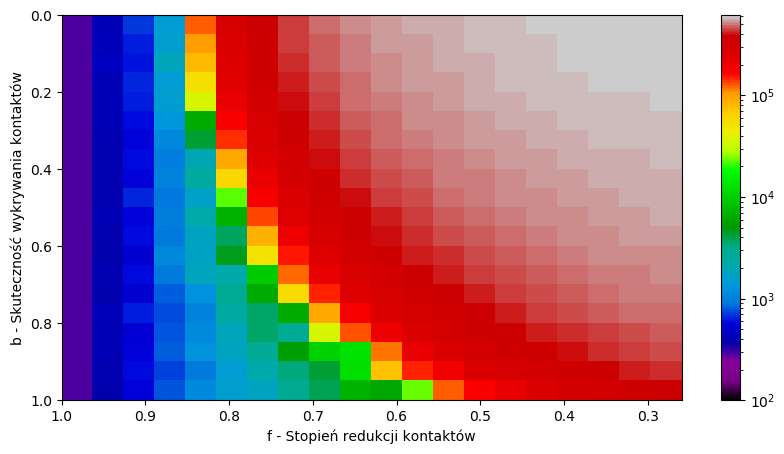

In [269]:
plot_heatmap(results_2, "_Wrocław_2day")

In [15]:
Cs = 0:0.05:1
tracking_probs = 0:0.05:1
param_grid = Iterators.product(Cs, tracking_probs) |> collect
results_3 = map(param_grid) do (c,p)
    println("c=$c p=$p")
    state = simple_run(tracking_prob=p, constant_kernel_param=c, tracking_delay=3.0)
    affected = getproperty.(state.individuals, :health) .!= Simulation.Healthy
    count(affected)
end

c=0.0 p=0.0
Empty queue after 2925 events 
  0.027169 seconds (2.00 k allocations: 172.014 KiB)
c=0.05 p=0.0
Empty queue after 4199 events 
  0.018475 seconds (2.14 k allocations: 178.312 KiB)
c=0.1 p=0.0
Empty queue after 6474 events 
  0.010306 seconds (3.86 k allocations: 281.297 KiB)
c=0.15 p=0.0
Empty queue after 13673 events 
  0.023897 seconds (9.23 k allocations: 586.938 KiB)
c=0.2 p=0.0
Empty queue after 1113819 events 
  4.849791 seconds (806.58 k allocations: 46.233 MiB, 8.22% gc time)
c=0.25 p=0.0
Empty queue after 2530810 events 
  8.868035 seconds (1.88 M allocations: 106.782 MiB, 0.93% gc time)
c=0.3 p=0.0
Empty queue after 3315390 events 
  9.856056 seconds (2.52 M allocations: 140.576 MiB, 2.11% gc time)
c=0.35 p=0.0
Empty queue after 3823882 events 
 16.092461 seconds (2.97 M allocations: 161.023 MiB, 7.85% gc time)
c=0.4 p=0.0
Empty queue after 4162143 events 
 13.389501 seconds (3.31 M allocations: 178.906 MiB, 5.39% gc time)
c=0.45 p=0.0
Empty queue after 4412354 e

c=0.6 p=0.15
Empty queue after 6228120 events 
 36.614499 seconds (4.36 M allocations: 226.772 MiB, 4.08% gc time)
c=0.65 p=0.15
Empty queue after 6401294 events 
 38.058372 seconds (4.55 M allocations: 231.826 MiB, 4.21% gc time)
c=0.7 p=0.15
Empty queue after 6572639 events 
 22.268658 seconds (4.72 M allocations: 236.445 MiB, 1.70% gc time)
c=0.75 p=0.15
Empty queue after 6702161 events 
 30.733899 seconds (4.88 M allocations: 240.127 MiB, 1.40% gc time)
c=0.8 p=0.15
Empty queue after 6840412 events 
 31.938200 seconds (5.02 M allocations: 243.546 MiB, 5.29% gc time)
c=0.85 p=0.15
Empty queue after 6937351 events 
 29.788097 seconds (5.17 M allocations: 246.594 MiB, 3.69% gc time)
c=0.9 p=0.15
Empty queue after 7055671 events 
 31.904740 seconds (5.31 M allocations: 249.836 MiB, 1.57% gc time)
c=0.95 p=0.15
Empty queue after 7143932 events 
 36.737001 seconds (5.43 M allocations: 268.067 MiB, 1.19% gc time)
c=1.0 p=0.15
Empty queue after 7259496 events 
 36.172166 seconds (5.57 M al

Empty queue after 8402 events 
  0.003872 seconds (3.94 k allocations: 337.438 KiB)
c=0.15 p=0.35
Empty queue after 12855 events 
  0.006056 seconds (6.23 k allocations: 464.328 KiB)
c=0.2 p=0.35
Empty queue after 66287 events 
  0.045246 seconds (34.10 k allocations: 2.181 MiB)
c=0.25 p=0.35
Empty queue after 1990432 events 
  1.231649 seconds (1.06 M allocations: 63.213 MiB, 3.94% gc time)
c=0.3 p=0.35
Empty queue after 4077776 events 
  2.525823 seconds (2.21 M allocations: 131.549 MiB, 1.58% gc time)
c=0.35 p=0.35
Empty queue after 5248281 events 
  3.430613 seconds (2.89 M allocations: 166.879 MiB, 1.39% gc time)
c=0.4 p=0.35
Empty queue after 6103785 events 
  4.164027 seconds (3.41 M allocations: 195.759 MiB, 1.03% gc time)
c=0.45 p=0.35
Empty queue after 6753902 events 
  4.760004 seconds (3.82 M allocations: 213.440 MiB, 0.98% gc time)
c=0.5 p=0.35
Empty queue after 7248360 events 
  5.246288 seconds (4.15 M allocations: 234.901 MiB, 1.74% gc time)
c=0.55 p=0.35
Empty queue af

Empty queue after 9149410 events 
  6.486946 seconds (5.23 M allocations: 292.571 MiB, 1.33% gc time)
c=0.75 p=0.5
Empty queue after 9368676 events 
  6.657179 seconds (5.43 M allocations: 297.540 MiB, 3.10% gc time)
c=0.8 p=0.5
Empty queue after 9589809 events 
  6.877937 seconds (5.62 M allocations: 286.555 MiB, 3.46% gc time)
c=0.85 p=0.5
Empty queue after 9742946 events 
  6.908793 seconds (5.79 M allocations: 306.450 MiB, 2.29% gc time)
c=0.9 p=0.5
Empty queue after 9895423 events 
  7.281522 seconds (5.96 M allocations: 310.077 MiB, 4.72% gc time)
c=0.95 p=0.5
Empty queue after 10068439 events 
  7.226533 seconds (6.13 M allocations: 314.104 MiB, 1.33% gc time)
c=1.0 p=0.5
Empty queue after 10205741 events 
  7.258373 seconds (6.28 M allocations: 317.366 MiB)
c=0.0 p=0.55
Empty queue after 4224 events 
  0.001813 seconds (1.76 k allocations: 175.969 KiB)
c=0.05 p=0.55
Empty queue after 6335 events 
  0.002530 seconds (2.77 k allocations: 275.844 KiB)
c=0.1 p=0.55
Empty queue afte

Empty queue after 458288 events 
  0.183122 seconds (225.83 k allocations: 13.915 MiB)
c=0.35 p=0.7
Empty queue after 2587902 events 
  1.258635 seconds (1.31 M allocations: 77.339 MiB, 2.31% gc time)
c=0.4 p=0.7
Empty queue after 4799317 events 
  2.581573 seconds (2.46 M allocations: 143.942 MiB, 1.82% gc time)
c=0.45 p=0.7
Empty queue after 6187503 events 
  3.589639 seconds (3.21 M allocations: 182.699 MiB, 2.83% gc time)
c=0.5 p=0.7
Empty queue after 7109375 events 
  4.359370 seconds (3.76 M allocations: 211.969 MiB, 4.34% gc time)
c=0.55 p=0.7
Empty queue after 7928058 events 
  5.078593 seconds (4.25 M allocations: 234.599 MiB, 5.76% gc time)
c=0.6 p=0.7
Empty queue after 8488634 events 
  5.576859 seconds (4.61 M allocations: 256.908 MiB, 4.66% gc time)
c=0.65 p=0.7
Empty queue after 8964250 events 
  5.934266 seconds (4.95 M allocations: 269.236 MiB, 1.76% gc time)
c=0.7 p=0.7
Empty queue after 9303157 events 
  6.266386 seconds (5.21 M allocations: 277.876 MiB, 1.36% gc time

Empty queue after 10314063 events 
  7.193607 seconds (6.27 M allocations: 318.952 MiB, 1.25% gc time)
c=1.0 p=0.85
Empty queue after 10514785 events 
  7.420653 seconds (6.48 M allocations: 323.943 MiB, 4.61% gc time)
c=0.0 p=0.9
Empty queue after 4922 events 
  0.001929 seconds (2.13 k allocations: 242.984 KiB)
c=0.05 p=0.9
Empty queue after 7604 events 
  0.003076 seconds (3.43 k allocations: 335.562 KiB)
c=0.1 p=0.9
Empty queue after 10889 events 
  0.004416 seconds (4.97 k allocations: 435.750 KiB)
c=0.15 p=0.9
Empty queue after 19141 events 
  0.007304 seconds (8.86 k allocations: 758.375 KiB)
c=0.2 p=0.9
Empty queue after 24507 events 
  0.009262 seconds (11.27 k allocations: 897.781 KiB)
c=0.25 p=0.9
Empty queue after 39645 events 
  0.016210 seconds (18.75 k allocations: 1.427 MiB)
c=0.3 p=0.9
Empty queue after 75335 events 
  0.031297 seconds (37.01 k allocations: 2.493 MiB)
c=0.35 p=0.9
Empty queue after 101998 events 
  0.039663 seconds (50.91 k allocations: 3.183 MiB)
c=0.

21×21 Array{Int64,2}:
    293     293     293     293     293  …     293     293     293     293
    432     422     451     424     426        394     393     400     404
    700     577     671     558     534        565     553     508     501
   1523    1203    1533    1722    1109        921     899     884     868
 125653  111474   89238   48398   25020       1074    1111    1039    1055
 290718  279043  259956  243917  219562  …    2088    1765    2205    1757
 384417  379537  364016  350461  330246       4144    3299    2612    3033
 446926  438933  429320  420318  405131       7353    4423    4669    2471
 488885  484266  477548  466457  453007     102105   10746    7196    6002
 520209  515370  508406  499498  489173     171651   90461   17905   10721
 541726  537978  531026  523705  515660  …  251165  189655  109867   38311
 558928  554888  549341  542753  535625     306061  257231  205269  140889
 571109  567085  562558  556442  550405     345469  304271  263527  217405
 58

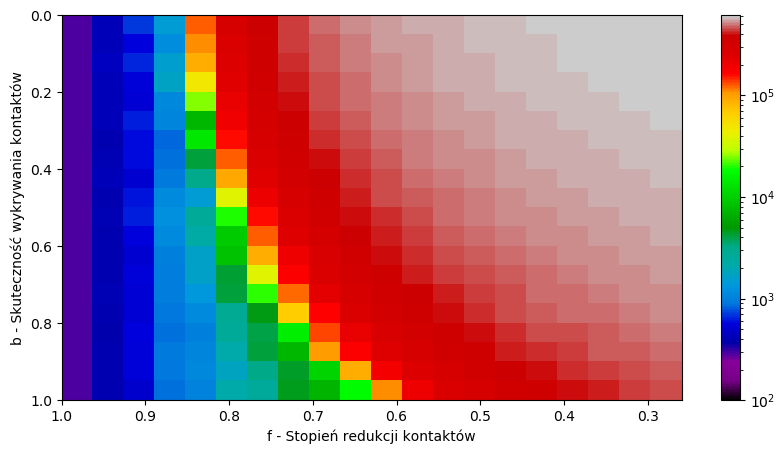

In [271]:
plot_heatmap(results_3, "_Wrocław_3day")

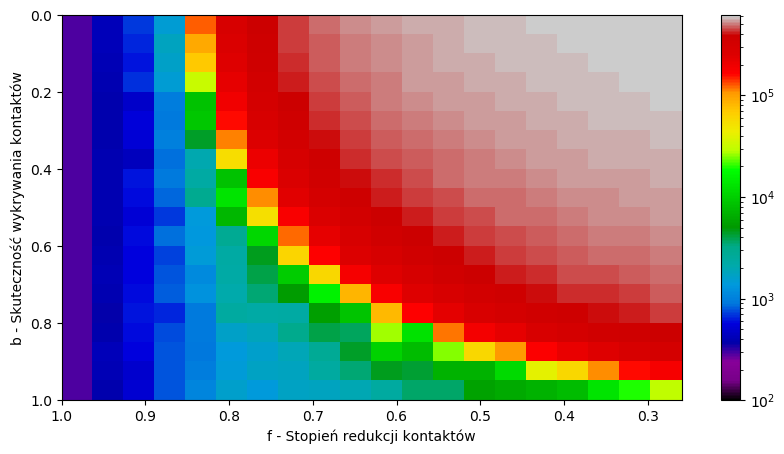

In [274]:
plot_heatmap(results_05, "_Wrocław_05day")

In [ ]:
Cs = 0:0.05:1
tracking_probs = 0:0.05:1
param_grid = Iterators.product(Cs, tracking_probs) |> collect
results_7 = map(param_grid) do (c,p)
    println("c=$c p=$p")
    state = simple_run(tracking_prob=p, constant_kernel_param=c, tracking_delay=7.0)
    affected = getproperty.(state.individuals, :health) .!= Simulation.Healthy
    count(affected)
end

c=0.0 p=0.0
Empty queue after 2925 events 
  0.005255 seconds (1.21 k allocations: 123.844 KiB)
c=0.05 p=0.0
Empty queue after 4199 events 
  0.008357 seconds (2.14 k allocations: 178.641 KiB)
c=0.1 p=0.0
Empty queue after 6474 events 
  0.005674 seconds (3.86 k allocations: 281.625 KiB)
c=0.15 p=0.0
Empty queue after 13673 events 
  0.019268 seconds (9.23 k allocations: 587.266 KiB)
c=0.2 p=0.0
Empty queue after 1113819 events 
  1.171299 seconds (806.58 k allocations: 46.233 MiB)
c=0.25 p=0.0
Empty queue after 2530810 events 
  5.913055 seconds (1.88 M allocations: 106.783 MiB, 59.52% gc time)
c=0.3 p=0.0
Empty queue after 3315390 events 
  5.649071 seconds (2.52 M allocations: 140.576 MiB, 12.28% gc time)
c=0.35 p=0.0
Empty queue after 3823882 events 
  4.431274 seconds (2.97 M allocations: 161.022 MiB, 5.44% gc time)
c=0.4 p=0.0
Empty queue after 4162143 events 
  5.047559 seconds (3.31 M allocations: 178.906 MiB, 3.44% gc time)
c=0.45 p=0.0
Empty queue after 4412354 events 
  4.91

Empty queue after 5091 events 
  0.004268 seconds (2.33 k allocations: 207.234 KiB)
c=0.1 p=0.35
Empty queue after 7896 events 
  0.004466 seconds (3.73 k allocations: 321.875 KiB)
c=0.15 p=0.35
Empty queue after 13438 events 
  0.006512 seconds (6.83 k allocations: 503.688 KiB)
c=0.2 p=0.35
Empty queue after 90161 events 
  0.043099 seconds (47.95 k allocations: 3.038 MiB)
c=0.25 p=0.35
Empty queue after 2774441 events 
  1.838106 seconds (1.53 M allocations: 92.936 MiB, 2.10% gc time)
c=0.3 p=0.35
Empty queue after 4419097 events 
  6.931354 seconds (2.47 M allocations: 148.074 MiB, 0.81% gc time)
c=0.35 p=0.35
Empty queue after 5476329 events 
 14.724605 seconds (3.11 M allocations: 185.180 MiB, 2.66% gc time)
c=0.4 p=0.35
Empty queue after 6215211 events 
  6.700009 seconds (3.58 M allocations: 207.261 MiB, 0.90% gc time)
c=0.45 p=0.35
Empty queue after 6771501 events 
  5.618220 seconds (3.94 M allocations: 230.846 MiB, 1.07% gc time)
c=0.5 p=0.35
Empty queue after 7167985 events 

In [27]:
Simulation.make_severity_dist(56)

DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},StaticArrays.SArray{Tuple{4},Float64,1,4}}(support=Base.OneTo(4), p=[0.0, 0.832, 0.141, 0.027])

In [71]:
@save "tracking_heatmap_wrocław.jld2" results_05, results_1, results_2, results_3 results_7


In [68]:
varinfo()

| name               |        size | summary                                                                                                |
|:------------------ | -----------:|:------------------------------------------------------------------------------------------------------ |
| Base               |             | Module                                                                                                 |
| Core               |             | Module                                                                                                 |
| Cs                 |    48 bytes | 21-element StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}             |
| Main               |             | Module                                                                                                 |
| Simulation         | 520.179 KiB | Module                                                                                                 |
| individuals_df     |   3.111 MiB | 636307×3 DataFrames.DataFrame                                                                          |
| make_severity_dist |     0 bytes | typeof(make_severity_dist)                                                                             |
| merge_history      |     0 bytes | typeof(merge_history)                                                                                  |
| param_grid         |   6.930 KiB | 21×21 Array{Tuple{Float64,Float64},2}                                                                  |
| population_df_path |    53 bytes | String                                                                                                 |
| results_1          |   3.484 KiB | 21×21 Array{Int64,2}                                                                                   |
| results_2          |   3.484 KiB | 21×21 Array{Int64,2}                                                                                   |
| results_3          |   3.484 KiB | 21×21 Array{Int64,2}                                                                                   |
| severity_dists     |   280 bytes | 6-element Array{DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},SArray{Tuple{4},Float64,1,4}},1} |
| simple_run         |     0 bytes | typeof(simple_run)                                                                                     |
| tracking_probs     |    48 bytes | 21-element StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}             |


make_severity_dist (generic function with 1 method)

In [61]:
@time severity_dists[1]

  0.000004 seconds (1 allocation: 48 bytes)


DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},SArray{Tuple{4},Float64,1,4}}(support=Base.OneTo(4), p=[0.0, 0.852, 0.144, 0.004])

In [56]:
@time Simulation.make_severity_dist(56)

  0.000003 seconds (1 allocation: 112 bytes)


DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},SArray{Tuple{4},Float64,1,4}}(support=Base.OneTo(4), p=[0.0, 0.832, 0.141, 0.027])